In [286]:
import pandas as pd
import numpy as np
training = pd.read_excel('training.xlsx')
scoring = pd.read_excel("scoring.xlsx")


In [287]:
training.shape

(41053, 10)

In [288]:
scoring.shape

(7546, 10)

In [289]:
training = training.rename(columns={'Date': 'year'})
training = training.rename(columns={'Vehicle Category': 'vehicleCategory'})
training = training.rename(columns={'GVWR Class': 'gvwrClass'})
training = training.rename(columns={'Fuel Type': 'fuelType'})
training = training.rename(columns={"Model Year": "modelYear"})
training = training.rename(columns={"Fuel Technology": "fuelTechnology"})
training = training.rename(columns={"Electric Mile Range": "electricMileRange"})
training = training.rename(columns={"Number of Vehicles Registered at the Same Address": "numVehiclesReg"})
training = training.rename(columns={"Vehicle Population:": "vehiclePopulation"})

#Using the mean as our dataset does not contain that many outliers etc.

In [290]:
# fill missing values with the mean of our modelYear column
training['modelYear'].fillna(training['modelYear'].mean(), inplace=True)

C:\Users\ginap\AppData\Local\Temp\ipykernel_14892\2663670663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training['modelYear'].fillna(training['modelYear'].mean(), inplace=True)


In [291]:
#Dropping the Region column
training = training.drop(columns=['Region'])

In [292]:
training["gvwrClassKN"] = training["gvwrClass"].apply(lambda x:  1 if x == "Unknown" else 0)
training["gvwrClass"] = training["gvwrClass"].replace("Not Applicable", 0)
training["gvwrClass"] = training["gvwrClass"].replace("Unknown", -1)

C:\Users\ginap\AppData\Local\Temp\ipykernel_14892\3723783033.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training["gvwrClass"] = training["gvwrClass"].replace("Unknown", -1)


#Our GVWR Column, 
#Not applicable = 0
#Unkown isss?
#So add a column where gvwr type included (binary)

In [293]:
print(training["gvwrClass"].apply(type).value_counts())

gvwrClass
<class 'int'>    41053
Name: count, dtype: int64


In [294]:
#electricMileRange, we are going to later on OneHotEncode this column
#fuelType, we are going to later on OneHotEncode this column
#numVehiclesReg, we are going to later on OneHotEncode this column

In [295]:
#An option, if this doesn't give us the results we want, we can OneHotEncode this instead
training

,year,vehicleCategory,gvwrClass,fuelType,modelYear,fuelTechnology,electricMileRange,numVehiclesReg,Vehicle Population,gvwrClassKN
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,≥4,395883,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,≥4,348475,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,≥4,333296,0
...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,0
41049,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,0
41050,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,0
41051,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,0


In [296]:
training["numVehiclesReg"] = training["numVehiclesReg"].apply(lambda x:  4 if x == "≥4" else x)
training["numVehiclesRegKN"] = training["numVehiclesReg"].apply(lambda x:  1 if x == "Unknown" else 0)
training["numVehiclesReg"] = training["numVehiclesReg"].replace("Unknown", -1)
training

C:\Users\ginap\AppData\Local\Temp\ipykernel_14892\1776417714.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training["numVehiclesReg"] = training["numVehiclesReg"].replace("Unknown", -1)


,year,vehicleCategory,gvwrClass,fuelType,modelYear,fuelTechnology,electricMileRange,numVehiclesReg,Vehicle Population,gvwrClassKN,numVehiclesRegKN
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,0,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,0,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,0,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,0,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,0,0
41049,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,0,0
41050,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,0,0
41051,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,0,0


In [297]:
print(training.dtypes)


year                    int64
vehicleCategory        object
gvwrClass               int64
fuelType               object
modelYear             float64
fuelTechnology         object
electricMileRange      object
numVehiclesReg          int64
Vehicle Population      int64
gvwrClassKN             int64
numVehiclesRegKN        int64
dtype: object


In [298]:
print(training['vehicleCategory'].apply(type).value_counts())

vehicleCategory
<class 'str'>    41053
Name: count, dtype: int64


In [299]:
print(training['gvwrClass'].apply(type).value_counts())

gvwrClass
<class 'int'>    41053
Name: count, dtype: int64


In [300]:
print(training['fuelType'].apply(type).value_counts())

fuelType
<class 'str'>    41053
Name: count, dtype: int64


In [301]:
print(training['modelYear'].apply(type).value_counts())

modelYear
<class 'float'>    41053
Name: count, dtype: int64


In [302]:
print(training['numVehiclesReg'].apply(type).value_counts())

numVehiclesReg
<class 'int'>    41053
Name: count, dtype: int64


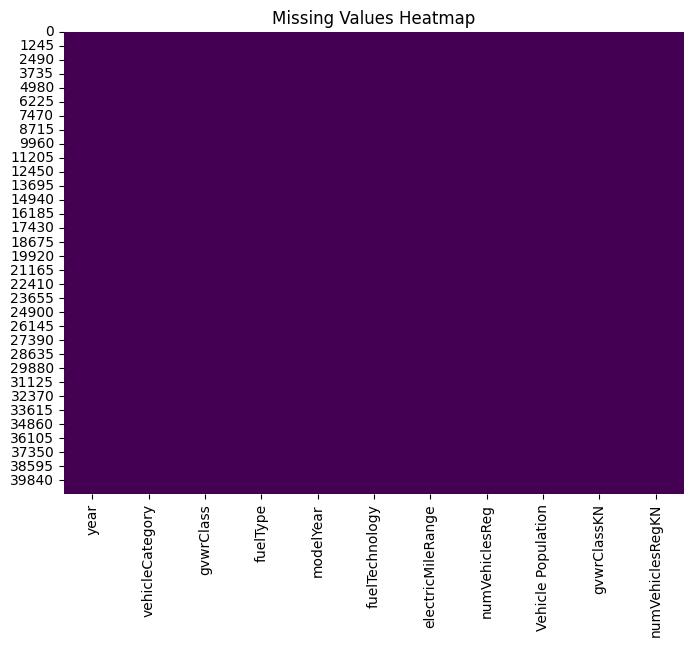

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(training.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [304]:
training

,year,vehicleCategory,gvwrClass,fuelType,modelYear,fuelTechnology,electricMileRange,numVehiclesReg,Vehicle Population,gvwrClassKN,numVehiclesRegKN
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,0,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,0,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,0,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,0,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,0,0
41049,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,0,0
41050,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,0,0
41051,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,0,0


In [305]:
training = pd.get_dummies(training, 
                          columns=["vehicleCategory", "fuelType", "fuelTechnology", "electricMileRange"], 
                          prefix=["vehicleCategory", "fuelType", "fuelTech", "electricRange"], 
                          prefix_sep="_")


In [306]:
training

,year,gvwrClass,modelYear,numVehiclesReg,Vehicle Population,gvwrClassKN,numVehiclesRegKN,vehicleCategory_B,vehicleCategory_BS,vehicleCategory_BT,...,fuelTech_BEV,fuelTech_FCEV,fuelTech_ICE,fuelTech_PHEV,electricRange_0 to 50 miles,electricRange_101 to 150 miles,electricRange_51 to 100 miles,electricRange_>150 miles,electricRange_Not Applicable,electricRange_Unknown
0,2019,0,2020.0,4,395883,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,2020,0,2020.0,1,370954,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2021,0,2020.0,1,349406,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,2019,0,2019.0,4,348475,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,2019,0,2018.0,4,333296,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,0,1983.0,1,1,0,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
41049,2019,0,1980.0,2,1,0,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
41050,2019,0,1978.0,3,1,0,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
41051,2019,0,1976.0,2,1,0,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [307]:
import pandas as pd

# Assuming 'df' is your DataFrame
filtered_df = training[(training['fuelType_Electric']) & (training['electricRange_Unknown'])]

# Display the result
print(filtered_df)


       year  gvwrClass  modelYear  numVehiclesReg  Vehicle Population  \
8066   2020          0     2019.0               2                 687   
8445   2020          0     2019.0               1                 616   
8502   2019          0     2018.0               4                 606   
8542   2020          0     2019.0               4                 595   
9275   2020          0     2019.0               3                 490   
...     ...        ...        ...             ...                 ...   
40755  2019          0     2000.0               4                   1   
40756  2019          0     1999.0               2                   1   
40757  2019          0     1998.0               1                   1   
40758  2019          0     1997.0               4                   1   
40759  2019          0     1975.0               1                   1   

       gvwrClassKN  numVehiclesRegKN  vehicleCategory_B  vehicleCategory_BS  \
8066             0                 0        

In [308]:
print(training.columns.tolist())


['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'Vehicle Population', 'gvwrClassKN', 'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS', 'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH', 'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2', 'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5', 'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen', 'fuelType_Natural Gas', 'fuelType_Unknown', 'fuelTech_BEV', 'fuelTech_FCEV', 'fuelTech_ICE', 'fuelTech_PHEV', 'electricRange_0 to 50 miles', 'electricRange_101 to 150 miles', 'electricRange_51 to 100 miles', 'electricRange_>150 miles', 'electricRange_Not Applicable', 'electricRange_Unknown']


In [309]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'training' is your dataset


In [310]:
X = training.drop(columns=["Vehicle Population"])  # Features
y = training["Vehicle Population"]  # Target variable


In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


In [312]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)
from sklearn.linear_model import Ridge

# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Regularization strength

ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Ridge Regression RMSE: {rmse_ridge}")


#y_pred = ridge_model.predict(X_test, num_iteration=ridge_model.best_iteration)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_ridge)
print(f"Mean Absolute Error: {mae}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_ridge)
print(f"R-squared: {r2}")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse}")



Ridge Regression RMSE: 17373.77501977454
Mean Absolute Error: 7263.406620666221
R-squared: 0.17222184739849555
Mean Squared Error: 301848058.4377419


In [313]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Lasso Regression RMSE: {rmse_lasso}")

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_lasso)
print(f"Mean Absolute Error: {mae}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_lasso)
print(f"R-squared: {r2}")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error: {mse}")


Lasso Regression RMSE: 17374.008213522462
Mean Absolute Error: 7265.600728877815
R-squared: 0.17219962609252226
Mean Squared Error: 301856161.40354604


C:\Users\ginap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.873e+11, tolerance: 1.157e+09
  model = cd_fast.enet_coordinate_descent(


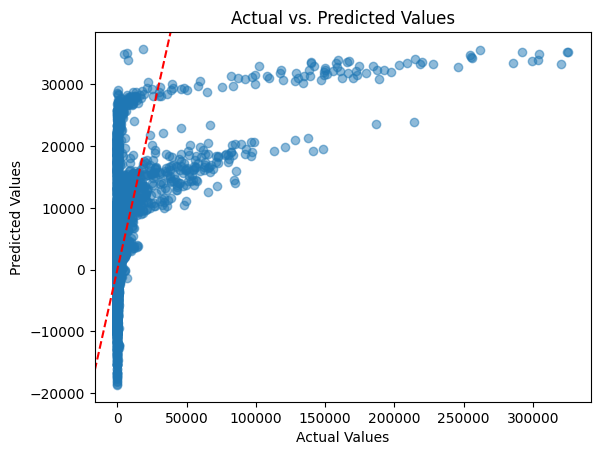

In [314]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed') 
plt.show()


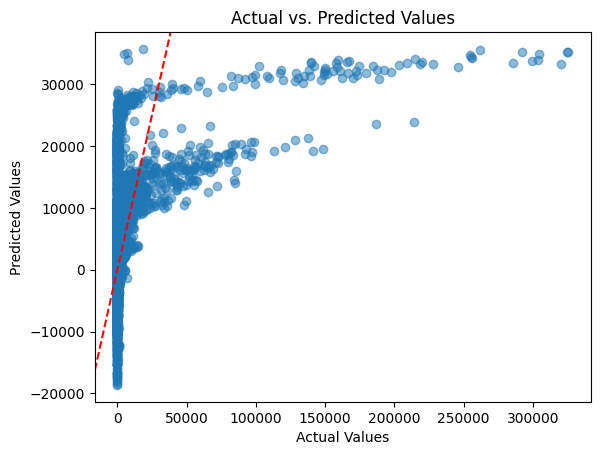

In [315]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed') 
plt.show()


In [316]:
import pandas as pd

scoring_df = pd.read_excel("scoring.xlsx")

print(scoring_df.head())


   Date Vehicle Category      GVWR Class Fuel Type  Model Year  \
0  2024                P  Not Applicable  Gasoline      2020.0   
1  2024                P  Not Applicable  Gasoline      2021.0   
2  2024                P  Not Applicable  Gasoline      2022.0   
3  2024                P  Not Applicable  Gasoline      2024.0   
4  2024                P  Not Applicable  Gasoline      2023.0   

  Fuel Technology Electric Mile Range  \
0             ICE      Not Applicable   
1             ICE      Not Applicable   
2             ICE      Not Applicable   
3             ICE      Not Applicable   
4             ICE      Not Applicable   

  Number of Vehicles Registered at the Same Address     Region  \
0                                                ≥4  Statewide   
1                                                ≥4  Statewide   
2                                                ≥4  Statewide   
3                                                ≥4  Statewide   
4                         

In [317]:
scoring_df = scoring_df.rename(columns={
    'Date': 'year',
    'Vehicle Category': 'vehicleCategory',
    'GVWR Class': 'gvwrClass',
    'Fuel Type': 'fuelType',
    "Model Year": "modelYear",
    "Fuel Technology": "fuelTechnology",
    "Electric Mile Range": "electricMileRange",
    "Number of Vehicles Registered at the Same Address": "numVehiclesReg",
    "Vehicle Population:": "vehiclePopulation"
})

scoring_df['modelYear'].fillna(scoring_df['modelYear'].mean(), inplace=True)
scoring_df = scoring_df.drop(columns=['Region'])

scoring_df["gvwrClassKN"] = scoring_df["gvwrClass"].apply(lambda x: 1 if x == "Unknown" else 0)
scoring_df["gvwrClass"] = scoring_df["gvwrClass"].replace("Unknown", -1)
scoring_df["gvwrClass"] = scoring_df["gvwrClass"].replace("Not Applicable", 0)

scoring_df["numVehiclesReg"] = scoring_df["numVehiclesReg"].apply(lambda x: 4 if x == "≥4" else x)
scoring_df["numVehiclesRegKN"] = scoring_df["numVehiclesReg"].apply(lambda x: 1 if x == "Unknown" else 0)
scoring_df["numVehiclesReg"] = scoring_df["numVehiclesReg"].replace("Unknown", -1)

scoring_df = pd.get_dummies(scoring_df,
                            columns=["vehicleCategory", "fuelType", "fuelTechnology", "electricMileRange"],
                            prefix=["vehicleCategory", "fuelType", "fuelTech", "electricRange"],
                            prefix_sep="_")

y_scoring_actual = scoring_df['Vehicle Population'] 

scoring_df = scoring_df.drop(columns=['Vehicle Population'])
if 'fuelType_Unknown' not in scoring_df.columns:
    scoring_df['fuelType_Unknown'] = 0




C:\Users\ginap\AppData\Local\Temp\ipykernel_14892\3478057665.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scoring_df['modelYear'].fillna(scoring_df['modelYear'].mean(), inplace=True)
C:\Users\ginap\AppData\Local\Temp\ipykernel_14892\3478057665.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [318]:
scoring_df

,year,gvwrClass,modelYear,numVehiclesReg,gvwrClassKN,numVehiclesRegKN,vehicleCategory_B,vehicleCategory_BS,vehicleCategory_BT,vehicleCategory_MC,...,fuelTech_FCEV,fuelTech_ICE,fuelTech_PHEV,electricRange_0 to 50 miles,electricRange_101 to 150 miles,electricRange_51 to 100 miles,electricRange_>150 miles,electricRange_Not Applicable,electricRange_Unknown,fuelType_Unknown
0,2024,0,2020.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
1,2024,0,2021.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
2,2024,0,2022.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
3,2024,0,2024.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
4,2024,0,2023.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,2024,0,1989.0,3,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
7542,2024,0,1988.0,2,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
7543,2024,0,1988.0,3,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
7544,2024,0,1987.0,2,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0


In [319]:
len(scoring_df.columns)

35

In [320]:
scoring_df.columns

Index(['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'gvwrClassKN',
       'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS',
       'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH',
       'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2',
       'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5',
       'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen',
       'fuelType_Natural Gas', 'fuelTech_BEV', 'fuelTech_FCEV', 'fuelTech_ICE',
       'fuelTech_PHEV', 'electricRange_0 to 50 miles',
       'electricRange_101 to 150 miles', 'electricRange_51 to 100 miles',
       'electricRange_>150 miles', 'electricRange_Not Applicable',
       'electricRange_Unknown', 'fuelType_Unknown'],
      dtype='object')

In [321]:
X_train.columns

Index(['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'gvwrClassKN',
       'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS',
       'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH',
       'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2',
       'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5',
       'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen',
       'fuelType_Natural Gas', 'fuelType_Unknown', 'fuelTech_BEV',
       'fuelTech_FCEV', 'fuelTech_ICE', 'fuelTech_PHEV',
       'electricRange_0 to 50 miles', 'electricRange_101 to 150 miles',
       'electricRange_51 to 100 miles', 'electricRange_>150 miles',
       'electricRange_Not Applicable', 'electricRange_Unknown'],
      dtype='object')

In [322]:
scoring_df = scoring_df[X_train.columns]


In [323]:
scoring_df.columns

Index(['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'gvwrClassKN',
       'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS',
       'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH',
       'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2',
       'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5',
       'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen',
       'fuelType_Natural Gas', 'fuelType_Unknown', 'fuelTech_BEV',
       'fuelTech_FCEV', 'fuelTech_ICE', 'fuelTech_PHEV',
       'electricRange_0 to 50 miles', 'electricRange_101 to 150 miles',
       'electricRange_51 to 100 miles', 'electricRange_>150 miles',
       'electricRange_Not Applicable', 'electricRange_Unknown'],
      dtype='object')

In [324]:
y_scoring_pred = ridge_model.predict(scoring_df)
rmse_scoring = np.sqrt(mean_squared_error(y_scoring_actual, y_scoring_pred))

In [325]:
print(f"Ridge Regression RMSE: {rmse_scoring}")

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_scoring_actual, y_scoring_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_scoring_actual, y_scoring_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_scoring_actual, y_scoring_pred)
print(f"Mean Squared Error: {mse}")


Ridge Regression RMSE: 17445.45256276216
Mean Absolute Error: 7607.345403927334
R-squared: 0.1968585877130543
Mean Squared Error: 304343815.11958474


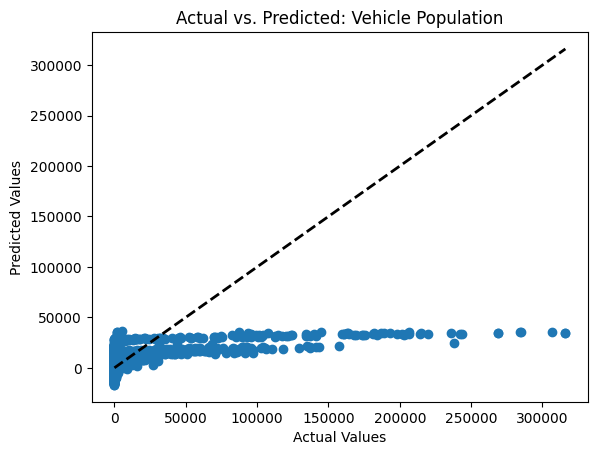

In [326]:
plt.scatter(y_scoring_actual, y_scoring_pred)
plt.plot([min(y_scoring_actual), max(y_scoring_actual)],
         [min(y_scoring_actual), max(y_scoring_actual)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted: Vehicle Population')
plt.show()


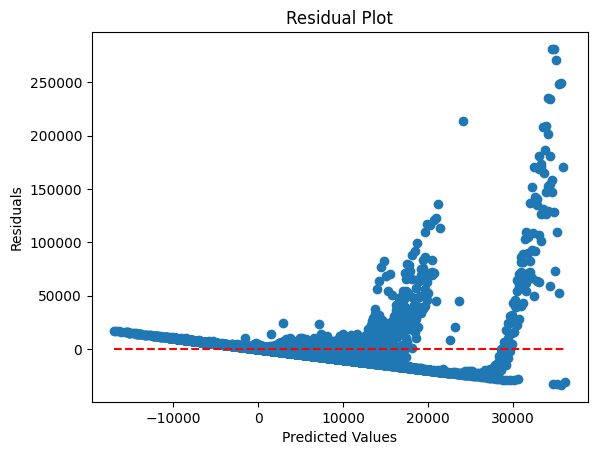

In [327]:
residuals = y_scoring_actual - y_scoring_pred

plt.scatter(y_scoring_pred, residuals)
plt.hlines(y=0, xmin=min(y_scoring_pred), xmax=max(y_scoring_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


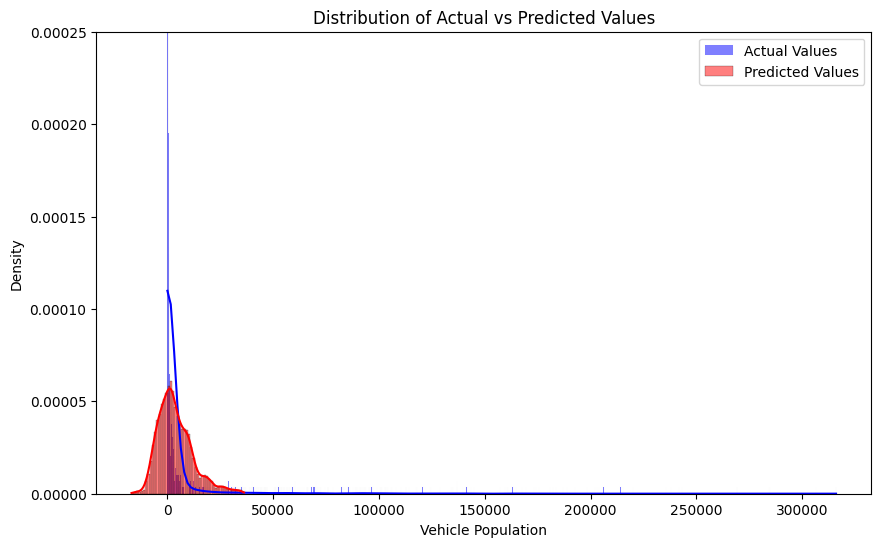

In [328]:
plt.figure(figsize=(10, 6))
sns.histplot(y_scoring_actual, color='blue', kde=True, label='Actual Values', stat='density')
sns.histplot(y_scoring_pred, color='red', kde=True, label='Predicted Values', stat='density')
plt.legend()
plt.title('Distribution of Actual vs Predicted Values')
plt.ylim(0, 0.00025)
plt.show()


In [329]:
y_scoring_pred = lasso_model.predict(scoring_df)
rmse_scoring = np.sqrt(mean_squared_error(y_scoring_actual, y_scoring_pred))
print(f"Lasso Regression RMSE: {rmse_scoring}")

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_scoring_actual, y_scoring_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_scoring_actual, y_scoring_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_scoring_actual, y_scoring_pred)
print(f"Mean Squared Error: {mse}")


Ridge Regression RMSE: 17445.52557214492
Mean Absolute Error: 7608.977851240069
R-squared: 0.19685186539028598
Mean Squared Error: 304346362.48836243


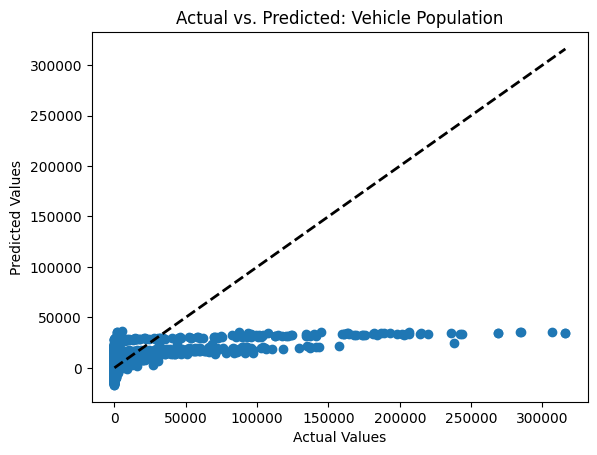

In [330]:
plt.scatter(y_scoring_actual, y_scoring_pred)
plt.plot([min(y_scoring_actual), max(y_scoring_actual)],
         [min(y_scoring_actual), max(y_scoring_actual)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted: Vehicle Population')
plt.show()


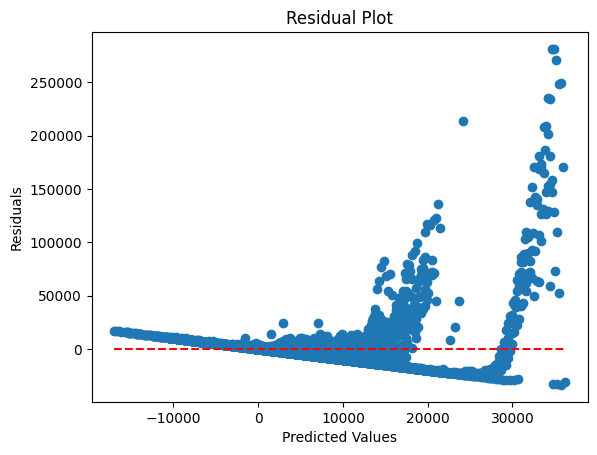

In [331]:
residuals = y_scoring_actual - y_scoring_pred

plt.scatter(y_scoring_pred, residuals)
plt.hlines(y=0, xmin=min(y_scoring_pred), xmax=max(y_scoring_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


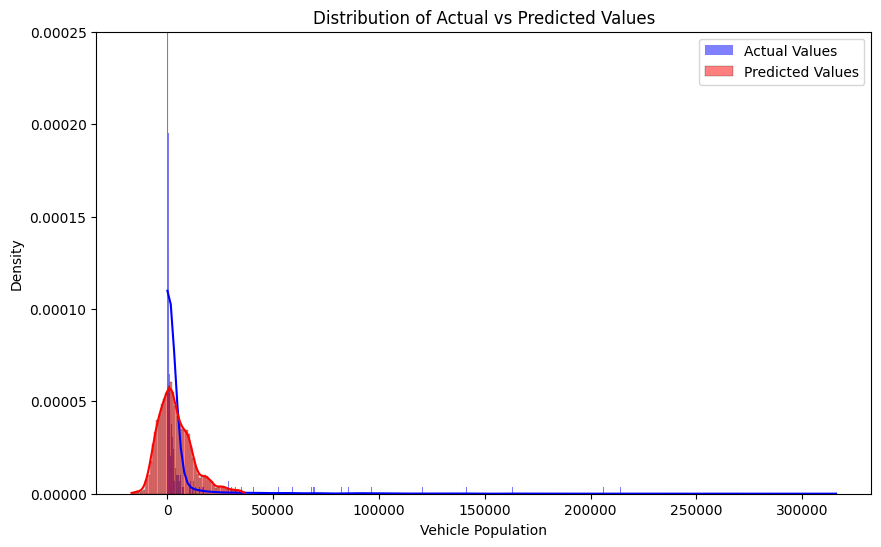

: 

In [332]:
plt.figure(figsize=(10, 6))
sns.histplot(y_scoring_actual, color='blue', kde=True, label='Actual Values', stat='density')
sns.histplot(y_scoring_pred, color='red', kde=True, label='Predicted Values', stat='density')
plt.legend()
plt.title('Distribution of Actual vs Predicted Values')
plt.ylim(0, 0.00025)
plt.show()
